In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
lap_times = pd.read_csv('./data/lap_times.csv')

In [3]:
def string_to_seconds(s):
    mins, secs = s.split(":")
    return (float(mins) * 60) + float(secs)

lap_times['TIME'] = lap_times['TIME'].apply(string_to_seconds)

In [4]:
#lap_times = pd.read_csv('./data/lap_times.csv')
tracks = pd.read_csv('./data/track_history.csv')

In [5]:
tracks['TRACK'] = tracks['TRACK'].apply(lambda x: x.lower())
tracks['RACE'] = tracks['TRACK'] + tracks['YEAR'].astype(str)
df = pd.merge(lap_times, tracks, 'left', ['RACE'])

# Pre-processing

In [6]:
## INTUITION

print("Before: {}".format(df.shape))

## Engineered Data, 'AVG_SPEED' : Average speed in the lap.

df['AVG_SPEED'] = (df['LENGTH'] / df['TIME'])  * 3600

## Reduce the features.

df['AIR_TEMP_AVG'] = (df['AIR_TEMP_MAX'] + df['AIR_TEMP_MIN']) / 2
df['TRACK_TEMP_AVG'] = (df['T_TEMP_MAX'] + df['T_TEMP_MIN']) / 2
df.drop(columns = ['AIR_TEMP_MAX', 'AIR_TEMP_MIN', 'T_TEMP_MAX', 'T_TEMP_MIN'], inplace = True)

## Dropping irrelevant features.

df.drop(columns = ['YEAR', 'TRACK'], inplace = True)

## Dropping laps where the driver was lapped.

def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True

df = df[df['GAP'].apply(lambda x: is_float(x))]
df['GAP'] = df['GAP'].astype(float)

## Removing laps on weather tires as they are anomalies.

df = df[~((df['TIRE'] == '') | (df['TIRE'] == 'Intermediate'))]

## Removing the first lap of the stint.

df = df[~(df['STINT_LAP'] == 0)]

## Dropping rows with anomaly lap times.

for race in df['RACE'].unique().tolist():
    mean, std = df[df['RACE'] == race]['TIME'].mean(), df['TIME'].std()
    df[df['RACE'] == race] = df[(df['RACE'] == race) & (mean + std > df['TIME']) & (df['TIME'] > mean - std)]

df.dropna(axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

print("After: {}".format(df.shape))

Before: (23097, 20)
After: (16117, 17)


In [7]:
df.groupby('RACE').first().sort_values('TRACK_TEMP_AVG')

,NO,GAP,TIME,TIRE,LAP,STINT_LAP,LENGTH,LAPS,DOWNFORCE,LATERAL,ASPHALT_ABR,ASPHALT_GRP,TIRE_STRESS,AVG_SPEED,AIR_TEMP_AVG,TRACK_TEMP_AVG
RACE,,,,,,,,,,,,,,,,
usa2015,9.0,64.827,114.207,Soft,17.0,1.0,5.51,56.0,3.0,4.0,3.0,2.0,3.0,173.684625,17.50,18.60
russia2015,33.0,20.784,109.022,Soft,2.0,1.0,5.84,53.0,4.0,5.0,1.0,4.0,2.0,192.841812,18.35,26.80
bahrain2016,6.0,0.000,98.149,Super,1.0,1.0,5.41,57.0,3.0,3.0,5.0,4.0,3.0,198.432995,21.90,27.75
abudhabi2015,6.0,0.000,107.014,Super,1.0,1.0,5.55,55.0,3.0,3.0,2.0,2.0,2.0,186.704543,26.05,28.40
bahrain2015,44.0,0.000,98.955,Soft,1.0,1.0,5.41,57.0,3.0,3.0,5.0,4.0,3.0,196.816735,25.15,29.90
austria2015,6.0,0.000,73.607,Super,6.0,6.0,4.33,71.0,4.0,3.0,1.0,2.0,2.0,211.773337,15.00,31.35
britain2015,14.0,6.193,112.411,Hard,2.0,1.0,5.89,52.0,4.0,5.0,3.0,4.0,5.0,188.629227,18.95,31.40
australia2016,5.0,0.000,91.664,Super,1.0,1.0,5.30,58.0,4.0,1.0,3.0,1.0,1.0,208.151510,23.45,32.60
australia2015,44.0,0.000,93.493,Soft,3.0,3.0,5.30,58.0,4.0,1.0,3.0,1.0,1.0,204.079450,19.00,33.50


In [8]:
vis_df = df[df['RACE'] == 'japan2015'].copy()
race_specific_columns = [
    'RACE',
    'LENGTH',
    'DOWNFORCE',
    'LATERAL',
    'ASPHALT_ABR',
    'ASPHALT_GRP',
    'TIRE_STRESS',
    'AIR_TEMP_AVG',
    'TRACK_TEMP_AVG',
    'AVG_SPEED'
]
vis_df.drop(columns = race_specific_columns, inplace = True)
vis_df.reset_index(inplace=True, drop=True)
display(vis_df.head())
display(vis_df.shape)

,NO,GAP,TIME,TIRE,LAP,STINT_LAP,LAPS
0,44.0,0.000,99.660,Medium,1.0,1.0,53.0
1,5.0,2.230,100.249,Medium,1.0,1.0,53.0
2,77.0,3.717,100.593,Medium,1.0,1.0,53.0
3,6.0,4.761,101.048,Medium,1.0,1.0,53.0
4,7.0,5.677,101.005,Medium,1.0,1.0,53.0


(711, 7)

# Visualization

In [9]:
tire_order = ['Super', 'Soft', 'Medium', 'Hard']

/Users/erenture/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


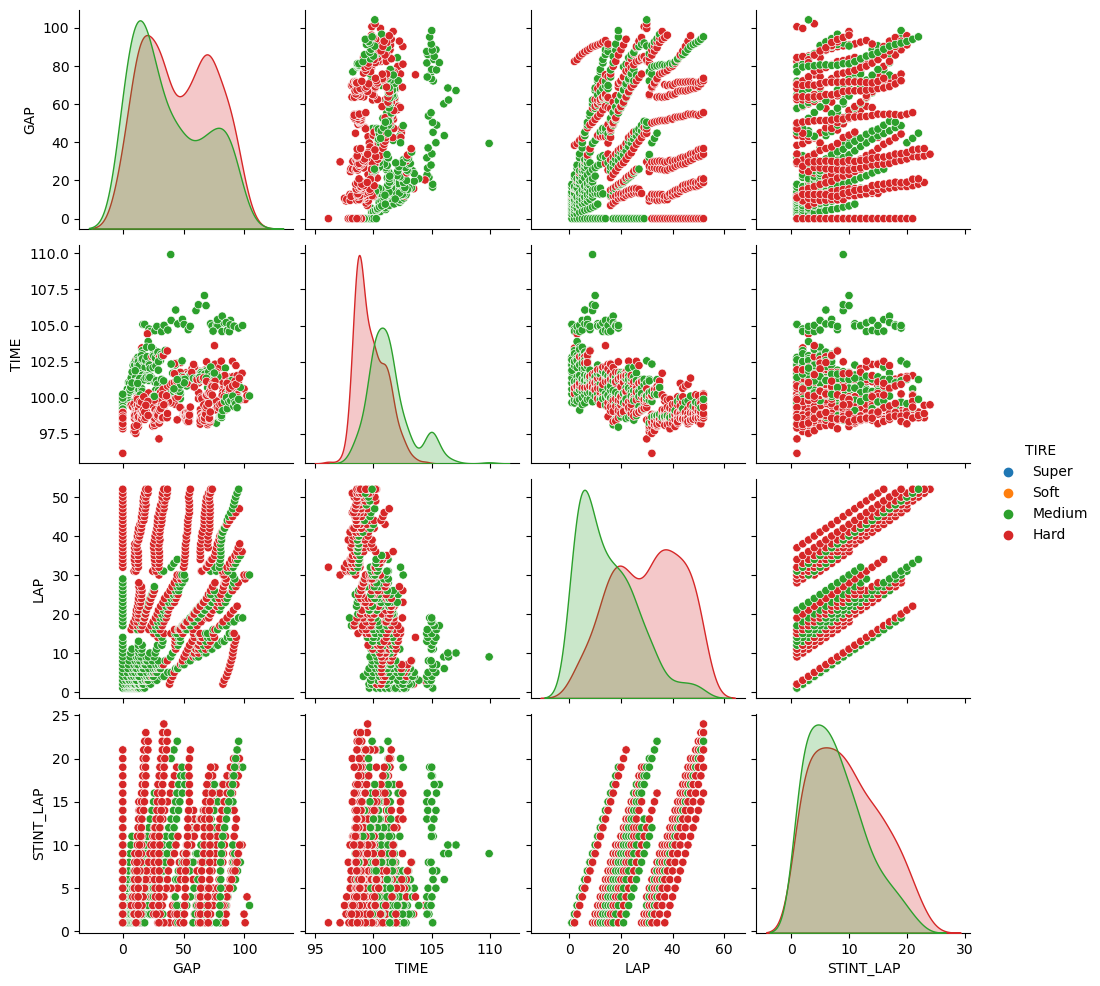

In [10]:
sns.pairplot(vis_df.drop(columns = ['NO', 'LAPS']), hue="TIRE", hue_order = tire_order) 

In [11]:
# drivers = vis_df['NO'].unique()
# for driver in drivers:
#     print(driver)
#     sns.scatterplot(vis_df[vis_df['NO'] == driver], x = 'LAP', y = 'TIME', hue = 'TIRE', hue_order = tire_order)

#     plt.xticks(range(0, int(vis_df['LAPS'].unique()[0]), 5))

#     for lap in vis_df[(vis_df['NO'] == driver) & (vis_df['STINT_LAP'] == 1)]['LAP'].to_list():
#         plt.axvline(lap - 1, ls = "--")
#     plt.figure(figsize=(5,3))
#     plt.show()

In [12]:
vis_df['NO'].unique()

array([44.,  5., 77.,  6.,  7.,  8., 13., 27., 14., 55.,  9., 22., 12.,
       33., 26., 28., 53., 11.,  3.])

# PCA

In [91]:
pca_X = vis_df.copy().drop(columns = ['NO', 'LAPS', 'TIRE'])
pca_X.reset_index(inplace=True, drop=True)
pca_y = vis_df['TIRE'].copy()

In [92]:
# tire_dict = dict(zip(tire_order, range(4)))
# print(tire_dict)
# pca_df['TIRE'] = pca_df['TIRE'].map(tire_dict)

In [93]:
for col in pca_X.columns:
    mean = pca_X[col].mean()
    std = pca_X[col].std()
    pca_X[col] = pca_X[col].apply(lambda x: (x - mean) / std)

In [94]:
pca_X.describe().round(2)

,GAP,TIME,LAP,STINT_LAP
count,711.00,711.00,711.00,711.00
mean,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.45,-2.49,-1.52,-1.40
25%,-0.91,-0.80,-0.83,-0.86
50%,-0.20,-0.14,-0.14,-0.14
75%,0.91,0.49,0.82,0.68
max,2.11,5.40,1.98,2.76


In [95]:
X = pca_X.to_numpy()
X.shape

(711, 4)

In [96]:
C = np.dot(X.T, X) / X.shape[0]
C.shape

(4, 4)

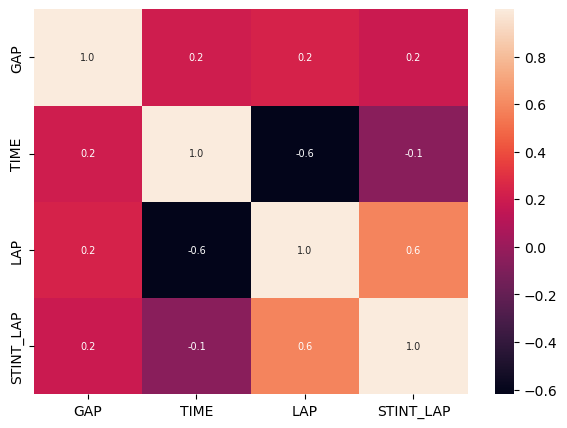

In [132]:
plt.subplots(figsize=(7, 5))
sns.heatmap(C, annot=True, fmt='.1f', annot_kws={"fontsize": 7},
            xticklabels = pca_X.columns,
            yticklabels = pca_X.columns
            )
plt.show()

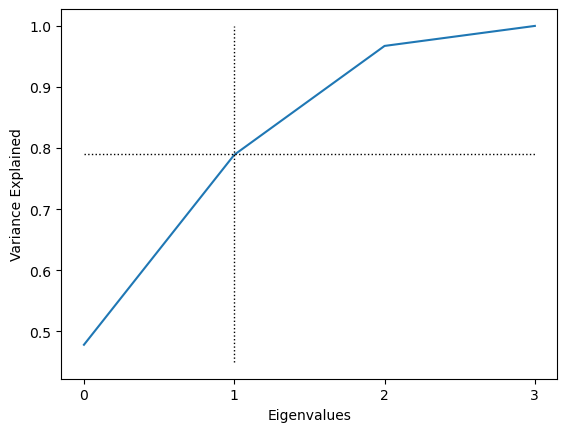

In [156]:
eigenvalues, eigenvectors = np.linalg.eig(C)
plt.plot(range(len(eigenvalues)), eigenvalues.cumsum() / eigenvalues.sum())

plt.xticks(range(len(eigenvalues)))

plt.xlabel('Eigenvalues')
plt.ylabel('Variance Explained')

plt.plot([0, 3], [.79, .79], color='k', linestyle='dotted', linewidth=1)
plt.plot([1, 1], [.45, 1], color='k', linestyle='dotted', linewidth=1)

plt.show()

In [135]:
eigenvalues / eigenvalues.sum()

array([0.4780868 , 0.31094322, 0.17822776, 0.03274222])

In [136]:
print(eigenvalues)
V = eigenvectors
print(V)

[1.90965753 1.24202356 0.71190835 0.13078468]
[[-0.1850109  -0.72436797  0.6206364   0.23637358]
 [ 0.46594042 -0.60402689 -0.36206681 -0.53568523]
 [-0.69556345  0.03274393  0.1014722  -0.71050878]
 [-0.51464744 -0.33071195 -0.6880563   0.39031545]]


In [147]:
tilde_X = np.dot(V[:2], X.T).T

In [148]:
tilde_X.shape

(711, 2)

In [149]:
tX_df = pd.DataFrame(tilde_X, columns=[f"X{i + 1}" for i in range(tilde_X.shape[1])])

In [150]:
tX_df['TIRE'] = vis_df['TIRE']

In [151]:
tX_df

,X1,X2,TIRE
0,-0.657787,0.912846,Medium
1,-0.916290,0.744596,Medium
2,-1.068435,0.649274,Medium
3,-1.263833,0.508486,Medium
4,-1.251788,0.537962,Medium
...,...,...,...
706,2.537715,-1.637741,Hard
707,2.146414,-1.299774,Hard
708,1.576543,-1.154710,Hard
709,1.473362,-0.815930,Hard


/Users/erenture/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



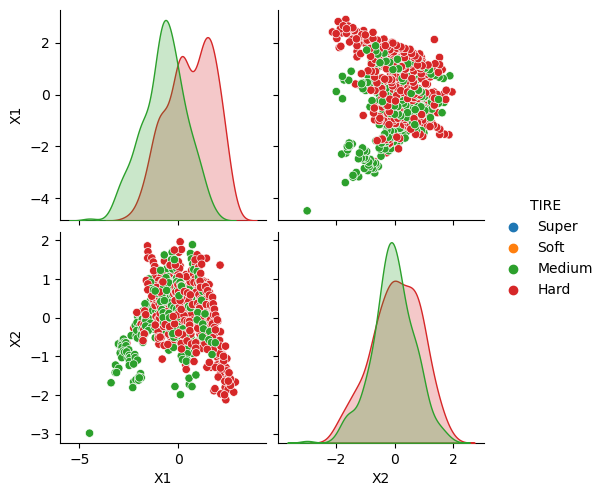

In [152]:
sns.pairplot(tX_df, hue='TIRE', hue_order=tire_order)

In [109]:
color_discrete_map = {'Medium': 'rgb(44,160,44)', 'Hard': 'rgb(214,39,40)'}
fig = px.scatter_3d(tX_df,
              x = 'X1', y = 'X2', z = 'X3',
              color = 'TIRE', color_discrete_map = color_discrete_map,
              width = 1000, height = 800)

fig.show()